In [ ]:
import os
from google.colab import drive

drive.mount('/content/drive')
os.chdir('drive/My Drive/Colab Notebooks/dissertation/final')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%run 'import_final.ipynb'

In [ ]:
%run 'functions_final.ipynb'

In [ ]:
%run 'agents_final.ipynb'

In [ ]:
%run 'plotting_final.ipynb'

In [ ]:
%run 'simulations_final.ipynb'

In [ ]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
results_path = './numerical_results'
plots_path = './plots'

# Learning Rate



In [ ]:
bellman_headers_to_load = ['2Traders_0Fees_9995LW_5a']
bellman_agent_names = ['Random Trader Update (2)']

In [ ]:
bellman_agents_dict, bellman_parameters_dict, bellman_bellman_loss_dict,\
  bellman_bellman_approx_dict =\
   load_agents_from_file_headers(bellman_headers_to_load, bellman_agent_names)
bellman_agents_dict = add_ideal_agents(bellman_agents_dict,
                                       bellman_parameters_dict,
                                       same_conditions=True)

success
GPU not available
tensor([0.0744])


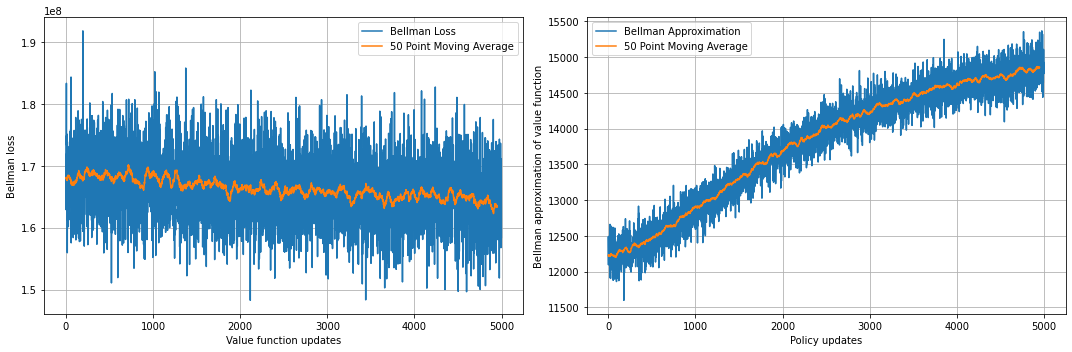

In [ ]:
# https://stackoverflow.com/questions/14313510/how-to-calculate-rolling-moving-average-using-python-numpy-scipy
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

fig, ax = plt.subplots(1, 2, figsize=(15,5))

for name, bellman_bellman_loss in bellman_bellman_loss_dict.items():
  ax[0].plot(torch.Tensor(bellman_bellman_loss).cpu(), label = 'Bellman Loss')
  ax[0].plot(moving_average(torch.Tensor(bellman_bellman_loss).cpu().numpy(), 50), label = '50 Point Moving Average')
  ax[1].plot(torch.Tensor(bellman_bellman_approx_dict[name]).cpu(), label = 'Bellman Approximation')
  ax[1].plot(moving_average(torch.Tensor(bellman_bellman_approx_dict[name]).cpu(), 50), label = '50 Point Moving Average')

ax[0].legend() 
ax[0].set_xlabel('Value function updates')
ax[0].set_ylabel('Bellman loss')
ax[0].grid()
ax[1].set_xlabel('Policy updates')
ax[1].set_ylabel('Bellman approximation of value function')
ax[1].grid()
ax[1].legend()

fig.tight_layout()
save_fig = True
fig_name = 'Bellman_loss_and_approx_2Traders.png'
if save_fig:
  fig.savefig(os.path.join(results_path,fig_name))
plt.show()

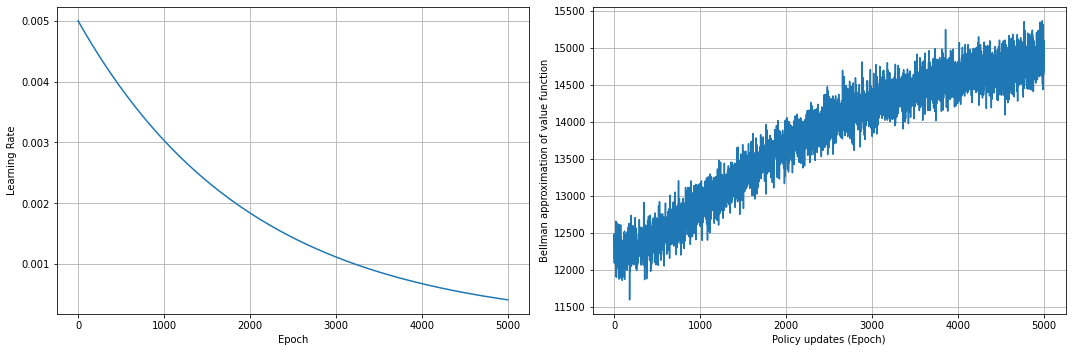

In [ ]:
x = np.linspace(0, 5000, 5000)
y = 0.005 * 0.9995**x

fig, ax = plt.subplots(1,2, figsize = (15,5))
ax[0].plot(x, y)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Learning Rate')
ax[0].grid()

for name, bellman_bellman_loss in bellman_bellman_loss_dict.items():
  #ax[1].plot(torch.Tensor(bellman_bellman_loss).cpu(), label = name)
  ax[1].plot(torch.Tensor(bellman_bellman_approx_dict[name]).cpu(), label = name)
  
#ax[1].set_xlabel('Value function updates')
#ax[1].set_ylabel('Bellman loss')
#ax[1].grid()
ax[1].set_xlabel('Policy updates (Epoch)')
ax[1].set_ylabel('Bellman approximation of value function')
ax[1].grid()
fig.tight_layout()
save_fig = True
fig_name = 'LearningRateDecay_1.png'
if save_fig:
  fig.savefig(os.path.join(plots_path, fig_name))
plt.show()

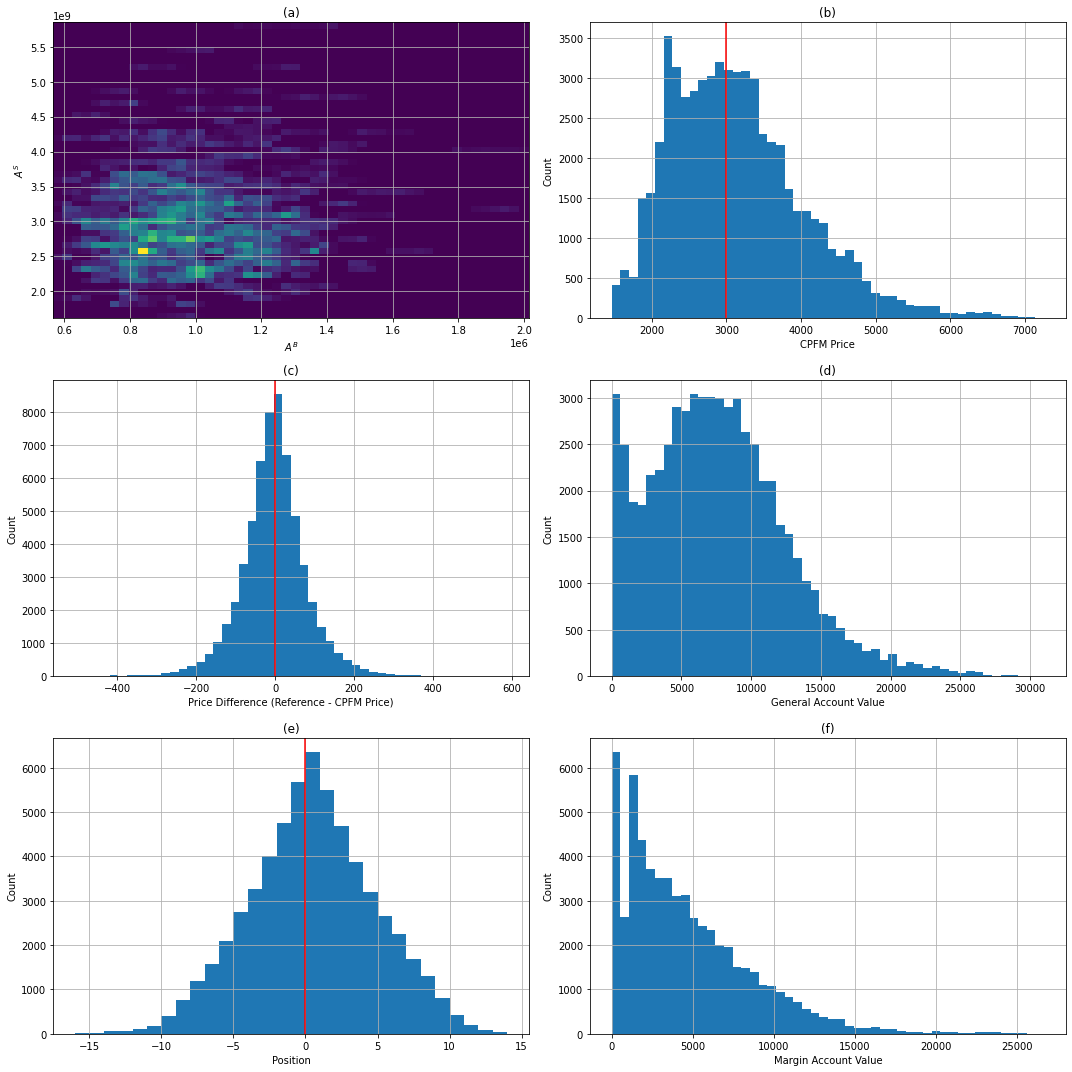

In [ ]:
state_space_agent = list(bellman_agents_dict.values())[0]
x0 = state_space_agent.x0_sampler(60000)

save_fig = True
fig_name = 'SimulatedSamplingDistributions.png'
plot_x0_dist_report(x0.numpy(), save_fig, x0_args =\
                    list(bellman_parameters_dict.values())[0]['x0_args'])

# Utility Function Comparison

In [ ]:
utility_headers_to_load = ['2Traders_0Fees_9995LW_3a', '2Traders_0Fees_9995LW_Pen0.5_3a', '2Traders_0Fees_9995LW_Pen1_3a', '2Traders_0Fees_9995LW_Pen2_3a', '2Traders_0Fees_9995LW_Pen5_3a', '2Traders_0Fees_9995LW_Pen10_3a']
utility_agent_names = ['Penalty Factor 0', 'Penalty Factor 0.5', 'Penalty Factor 1', 'Penalty Factor 2', 'Penalty Factor 5', 'Penalty Factor 10']

In [ ]:
utility_agents_dict, utility_parameters_dict, utility_bellman_loss_dict, utility_bellman_approx_dict = load_agents_from_file_headers(utility_headers_to_load, utility_agent_names)
utility_agents_dict = add_ideal_agents(utility_agents_dict, utility_parameters_dict, same_conditions=True)

success
GPU not available
tensor([0.4422])
success
GPU not available
tensor([0.1985])
success
GPU not available
tensor([0.1985])
success
GPU not available
tensor([0.4422])
success
GPU not available
tensor([0.4422])
success
GPU not available
tensor([0.1985])


In [ ]:
n_mc = 10000
n_steps = 100
# Assumes the same x0_sampler and s_args for all agents

# IMPORTANT : sample from the initial distribution not from the test data 
# generator in the agent
simulation_sampler = partial(sample_x0, device=device, **utility_parameters_dict[utility_agent_names[0]]['x0_args']) 
utility_results = simulate_strategies(utility_agents_dict, n_mc, n_steps, simulation_sampler, **utility_parameters_dict[utility_agent_names[0]]['s_args'])

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [ ]:
for result in utility_results:
    pnl = result.final_profits()
    print(f'{result.name} - Mean PnL: {torch.mean(pnl)}, Std: {torch.std(pnl)}')

Penalty Factor 0 - Mean PnL: 2221.375061792777, Std: 1272.2633437390546
Penalty Factor 0.5 - Mean PnL: 2145.7680892820954, Std: 1204.030860131539
Penalty Factor 1 - Mean PnL: 1774.4170957919096, Std: 1094.6302378781895
Penalty Factor 2 - Mean PnL: 1334.7304407540782, Std: 933.1422883277023
Penalty Factor 5 - Mean PnL: 684.4336578390318, Std: 591.9711240100484
Penalty Factor 10 - Mean PnL: 314.3056255494707, Std: 291.8812277958869
Ideal Agent - Mean PnL: 2217.9182567631588, Std: 1277.7396778315847


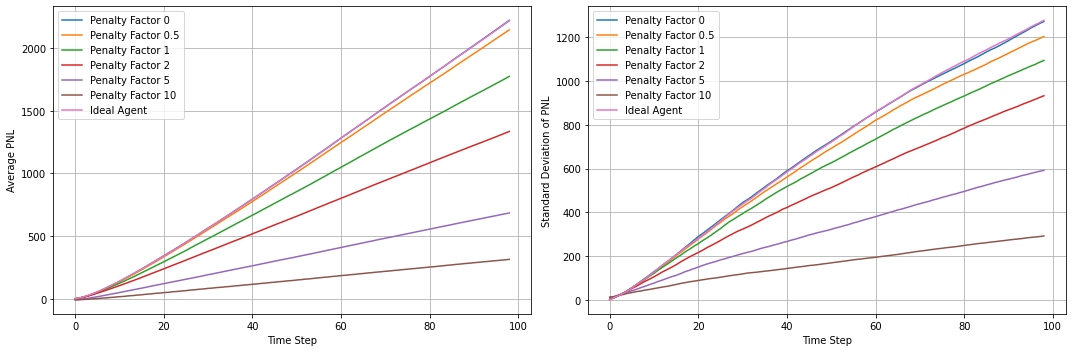

In [ ]:
save_fig = True
fig_name = 'PNL_over_time_penalties_1.png'

plot_average_pnl_over_time(utility_results, fig_name, save_fig)

Take the actual data from here - averaged over 10 steps

In [ ]:
n_mc = 10000
n_steps = 100
# Assumes the same x0_sampler and s_args for all agents

# IMPORTANT : sample from the initial distribution not from the test data 
# generator in the agent
# These x0 args should be the same for both markets
simulation_sampler = partial(sample_x0, device=device, **utility_parameters_dict[utility_agent_names[0]]['x0_args']) 

sim_means = dict()
sim_stds = dict()
for name in utility_agents_dict.keys():
  sim_means[name] = list()
  sim_stds[name] = list()

# Set to 10 to get error terms
for i in range(10):
 
  utility_results = simulate_strategies(utility_agents_dict, n_mc, n_steps, simulation_sampler, **utility_parameters_dict[utility_agent_names[0]]['s_args'])

  #results = simulate_strategies_var_fees(agents_dict, n_mc, n_steps, simulation_sampler, [0, 0.005, 0.01, 0.03], **parameters_dict[agent_names[0]]['s_args'])
  for result in utility_results:
    pnl = result.final_profits()
    print(f'{result.name} - Mean PnL: {torch.mean(pnl)}, Std: {torch.std(pnl)}')
    sim_means[result.name].append(torch.mean(pnl))
    sim_stds[result.name].append(torch.std(pnl))

mean_means = list()
mean_stds = list()
std_means = list()
std_stds = list()

for result in utility_results:
  if 'Ideal' not in result.name:
    mean_means.append(np.mean(sim_means[result.name]))
    mean_stds.append(np.std(sim_means[result.name]))
    std_means.append(np.mean(sim_stds[result.name]))
    std_stds.append(np.std(sim_stds[result.name]))
  print(f'{result.name} - Mean PnL Mean: {np.mean(sim_means[result.name])},  Mean PnL Std: {np.std(sim_means[result.name])}')
  print(f'{result.name} - Std PnL Mean: {np.mean(sim_stds[result.name])},  Std PnL Std: {np.std(sim_stds[result.name])}')

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Penalty Factor 0 - Mean PnL: 2214.1742615590965, Std: 1249.9314377591327
Penalty Factor 0.5 - Mean PnL: 2133.3278210485732, Std: 1179.5592105535115
Penalty Factor 1 - Mean PnL: 1772.8711478624798, Std: 1090.6096250394176
Penalty Factor 2 - Mean PnL: 1322.4840221329491, Std: 919.29585298641
Penalty Factor 5 - Mean PnL: 678.5021678193068, Std: 585.7196215713938
Penalty Factor 10 - Mean PnL: 311.92739840753563, Std: 288.15855102211367
Ideal Agent - Mean PnL: 2206.737102173964, Std: 1262.905741116716
Penalty Factor 0 - Mean PnL: 2185.5094165269984, Std: 1237.417601423526
Penalty Factor 0.5 - Mean PnL: 2111.6767857548616, Std: 1175.6873915722472
Penalty Factor 1 - Mean PnL: 1753.7254313094736, Std: 1078.6235903804104
Penalty Factor 2 - Mean PnL: 1318.6338609579886, Std: 924.3274491831971
Penalty Factor 5 - Mean PnL: 678.7119076453962, Std: 592.3474347581007
Penalty Factor 10 - Mean PnL: 306.60987980207614, Std: 290.13369076320896
Ideal Agent - Mean PnL: 2180.420129827217, Std: 1258.18948561

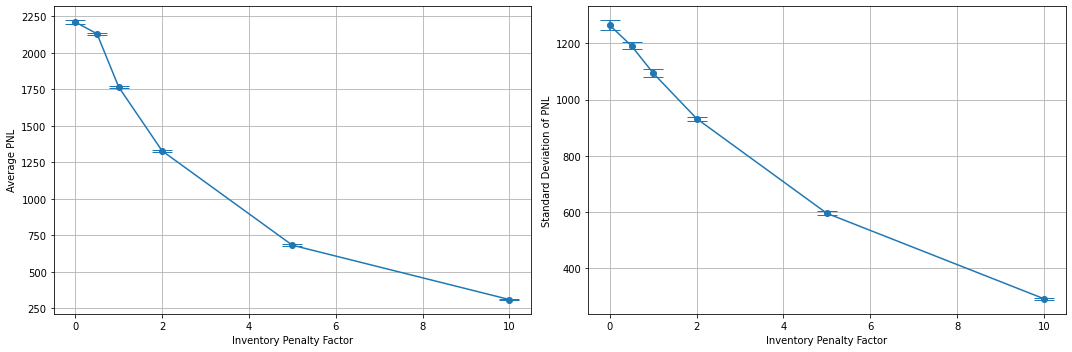

In [ ]:
penalties = list()
means = list()
stds = list()

for name in utility_agent_names:
  penalties.append(utility_parameters_dict[name]['utility_args']['penalty_factor'])

  for result in utility_results:

    if result.name == name:
      pnl = result.final_profits()
      means.append(torch.mean(pnl))
      stds.append(torch.std(pnl))

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
#ax[0].plot(penalties, means, marker='o')

ax[0].errorbar(penalties, mean_means, yerr = mean_stds, marker='o', capsize=10)
ax[0].grid()
ax[0].set_xlabel('Inventory Penalty Factor')
ax[0].set_ylabel('Average PNL')

ax[1].errorbar(penalties, std_means, yerr = std_stds, marker='o', capsize=10)
#ax[1].plot(penalties, stds, marker='o')
ax[1].grid()
ax[1].set_xlabel('Inventory Penalty Factor')
ax[1].set_ylabel('Standard Deviation of PNL')

fig.tight_layout()

save_fig = True
fig_name = 'PNL_vs_penalty_1.png'

if save_fig:
  fig.savefig(os.path.join(plots_path, fig_name))

plt.show()

# Market Comparison

How do I justify training one more than the other?

In [ ]:
market_headers_to_load = ['PMU_0Fees_9995LW_5a', '1Traders_0Fees_9995LW_5a', '2Traders_0Fees_9995LW_5a', '3Traders_0Fees_9995LW_5a' ]
market_agent_names = ['Exact Price Match', '1 Random Trader', '2 Random Traders', '3 Random Traders']

In [ ]:
market_agents_dict, market_parameters_dict, market_bellman_loss_dict, market_bellman_approx_dict = load_agents_from_file_headers(market_headers_to_load, market_agent_names)
market_agents_dict = add_ideal_agents(market_agents_dict, market_parameters_dict, same_conditions=False)

success
GPU not available
tensor([0.9587])
success
GPU not available
tensor([0.6186])
success
GPU not available
tensor([0.0744])
success
GPU not available
tensor([0.9893])


When generating numbers for final report use n_mc = 100000 and run from top so that random seed is consistent

In [ ]:
n_mc = 10000
n_steps = 100
# Assumes the same x0_sampler and s_args for all agents

# IMPORTANT : sample from the initial distribution not from the test data 
# generator in the agent
# These x0 args should be the same for both markets
simulation_sampler = partial(sample_x0, device=device, **market_parameters_dict[market_agent_names[0]]['x0_args']) 

sim_means = dict()
sim_stds = dict()
for name in market_agents_dict.keys():
  sim_means[name] = list()
  sim_stds[name] = list()

# Set to 10 to get error terms
for i in range(10):
 
  market_results = simulate_strategies(market_agents_dict, n_mc, n_steps, simulation_sampler, **market_parameters_dict[market_agent_names[0]]['s_args'])

  #results = simulate_strategies_var_fees(agents_dict, n_mc, n_steps, simulation_sampler, [0, 0.005, 0.01, 0.03], **parameters_dict[agent_names[0]]['s_args'])
  for result in market_results:
    pnl = result.final_profits()
    print(f'{result.name} - Mean PnL: {torch.mean(pnl)}, Std: {torch.std(pnl)}')
    sim_means[result.name].append(torch.mean(pnl))
    sim_stds[result.name].append(torch.std(pnl))

for result in market_results:
  print(f'{result.name} - Mean PnL Mean: {np.mean(sim_means[result.name])},  Mean PnL Std: {np.std(sim_means[result.name])}')
  print(f'{result.name} - Std PnL Mean: {np.mean(sim_stds[result.name])},  Std PnL Std: {np.std(sim_stds[result.name])}')

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Exact Price Match - Mean PnL: 1841.8897843194757, Std: 520.9938970166784
1 Random Trader - Mean PnL: 1834.3786337076076, Std: 1303.14537061732
2 Random Traders - Mean PnL: 2238.4918492912175, Std: 1318.6065812496654
3 Random Traders - Mean PnL: 2269.8271641867454, Std: 1128.2957305315672
Exact Price Match Ideal Agent - Mean PnL: 1844.2689733485083, Std: 511.40067766457963
1 Random Trader Ideal Agent - Mean PnL: 1819.5770143162877, Std: 1327.2229282441574
2 Random Traders Ideal Agent - Mean PnL: 2251.136445472655, Std: 1333.5391024882822
3 Random Traders Ideal Agent - Mean PnL: 2267.841026040679, Std: 1142.6575140884738
Exact Price Match - Mean PnL: 1832.1027824634027, Std: 521.1091584595243
1 Random Trader - Mean PnL: 1816.4727127501656, Std: 1253.2674889654918
2 Random Traders - Mean PnL: 2212.8806646106223, Std: 1275.117022190466
3 Random Traders - Mean PnL: 2246.7136872674937, Std: 1110.7098553308463
Exact Price Match Ideal Agent - Mean PnL: 1839.595047924227, Std: 514.1581165821359

Exact Price Match std of diff: 34.556015050784794 
1 Random Trader std of diff: 85.0843379071365 
2 Random Traders std of diff: 58.55808662049374 
3 Random Traders std of diff: 48.527013097259086 
Exact Price Match Ideal Agent std of diff: 34.556015050784794 
1 Random Trader Ideal Agent std of diff: 84.91145330002112 
2 Random Traders Ideal Agent std of diff: 58.56139977642615 
3 Random Traders Ideal Agent std of diff: 48.57779556437171 


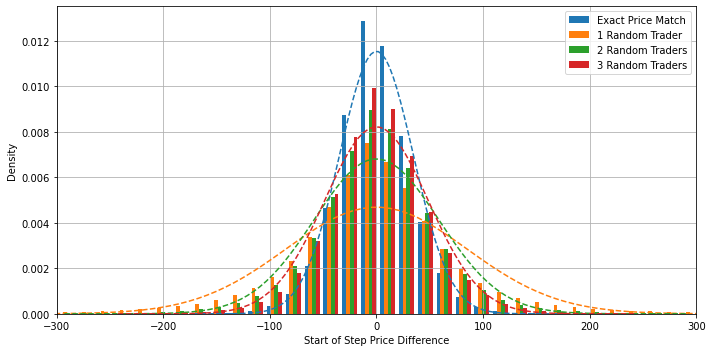

In [ ]:
import scipy.stats as stats


fig, ax = plt.subplots(1, 1, figsize = (10, 5))

i = 0
min_x = 0
max_x = 0

ideal_diffs_sot = list()
ideal_labels_sot = list()
ideal_sot_stds = list()
diffs_sot = list()
diffs_sot_stds = list()
diff_labels_sot = list()

for result in market_results:
  diff = result.get_start_of_step_price_differential().cpu().numpy().flatten()
  std = np.std(diff)
  print(f'{result.name} std of diff: {std} ')
  if 'Ideal' in result.name:
    ideal_diffs_sot.append(diff)
    ideal_labels_sot.append(result.name)
    ideal_sot_stds.append(std)
  else:
    diffs_sot.append(diff)
    diff_labels_sot.append(result.name)
    diffs_sot_stds.append(std)

ax.hist(diffs_sot,bins=100, density = True, label = diff_labels_sot)
ax.grid()
ax.legend()
ax.set_xlabel('Start of Step Price Difference')
ax.set_ylabel('Density')
colours = plt.rcParams['axes.prop_cycle'].by_key()['color']
i = 0
for std in diffs_sot_stds:
  x = np.linspace(- 5*std, 5*std, 100)
  ax.plot(x, stats.norm.pdf(x, 0, std), '--', color = colours[i])
  i += 1
ax.set_xlim([-300, 300])

'''
ax[1].hist(ideal_diffs_sot,bins =60, density = True, label = ideal_labels_sot)
i = 0
for std in ideal_sot_stds:
  x = np.linspace(- 3*std, 3*std, 100)
  ax[1].plot(x, stats.norm.pdf(x, 0, std), '--', color = colours[i])
  i += 1
ax[1].grid()
ax[1].legend()
ax[1].set_xlabel('Start of Step Price Difference')
ax[1].set_ylabel('Density')
ax[1].set_xlim([-450, 450])
'''

fig.tight_layout()

fig_name = 'StartOfStepResiduePlot_1.png'
save_fig = True
if save_fig:
  fig.savefig(os.path.join(plots_path, fig_name))

plt.show()

# Fees

In [ ]:
fee_headers_to_load = ['2Traders_0Fees_9995LW_3a', '2Traders_0.001Fees_9995LW_3a', 
                       '2Traders_0.002Fees_9995LW_3a','2Traders_0.0025Fees_9995LW_3a',
                       '2Traders_0.003Fees_9995LW_3a','2Traders_0.0035Fees_9995LW_3a',
                       '2Traders_0.004Fees_9995LW_3a', '2Traders_0.005Fees_9995LW_3a',
                       '2Traders_0.007Fees_9995LW_3a', '2Traders_0.01Fees_9995LW_3a',
                       '2Traders_0.015Fees_9995LW_3a', '2Traders_0.03Fees_9995LW_2a'] # TODO: 3% in table but not graph
fee_agent_names = ['0%', '0.1%', '0.2%', '0.25%', '0.3%' ,'0.35%' , '0.4%', '0.5%', '0.7%', '1%', '1.5%', '3%']

In [ ]:
fee_agents_dict, fee_parameters_dict, fee_bellman_loss_dict, fee_bellman_approx_dict = load_agents_from_file_headers(fee_headers_to_load, fee_agent_names)
fee_agents_dict = add_ideal_agents(fee_agents_dict, fee_parameters_dict, same_conditions=False)

success
GPU not available
tensor([0.4422])
success
GPU not available
tensor([0.1985])
success
GPU not available
tensor([0.1985])
success
GPU not available
tensor([0.1985])
success
GPU not available
tensor([0.4422])
success
GPU not available
tensor([0.7446])
success
GPU not available
tensor([0.1985])
success
GPU not available
tensor([0.1985])
success
GPU not available
tensor([0.1985])
success
GPU not available
tensor([0.1985])
success
GPU not available
tensor([0.1985])
success
GPU not available
tensor([0.7446])


In [ ]:
n_mc = 10000
n_steps = 100
# Assumes the same x0_sampler and s_args for all agents

# IMPORTANT : sample from the initial distribution not from the test data 
# generator in the agent
# These x0 args should be the same for both markets
simulation_sampler = partial(sample_x0, device=device, **fee_parameters_dict[fee_agent_names[0]]['x0_args']) 

sim_means = dict()
sim_stds = dict()
for name in fee_agents_dict.keys():
  sim_means[name] = list()
  sim_stds[name] = list()

# Set to 10 to get error terms
for i in range(10):
 
  fee_results = simulate_strategies(fee_agents_dict, n_mc, n_steps, simulation_sampler, **fee_parameters_dict[fee_agent_names[0]]['s_args'])

  #results = simulate_strategies_var_fees(agents_dict, n_mc, n_steps, simulation_sampler, [0, 0.005, 0.01, 0.03], **parameters_dict[agent_names[0]]['s_args'])
  for result in fee_results:
    pnl = result.final_profits()
    print(f'{result.name} - Mean PnL: {torch.mean(pnl)}, Std: {torch.std(pnl)}')
    sim_means[result.name].append(torch.mean(pnl))
    sim_stds[result.name].append(torch.std(pnl))

mean_means = list()
mean_stds = list()
std_means = list()
std_stds = list()

for result in fee_results:
  if 'Ideal' not in result.name:
    mean_means.append(np.mean(sim_means[result.name]))
    mean_stds.append(np.std(sim_means[result.name]))
    std_means.append(np.mean(sim_stds[result.name]))
    std_stds.append(np.std(sim_stds[result.name]))
  print(f'{result.name} - Mean PnL Mean: {np.mean(sim_means[result.name])},  Mean PnL Std: {np.std(sim_means[result.name])}')
  print(f'{result.name} - Std PnL Mean: {np.mean(sim_stds[result.name])},  Std PnL Std: {np.std(sim_stds[result.name])}')

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


0% - Mean PnL: 2213.2619704570643, Std: 1272.431523876896
0.1% - Mean PnL: 1930.8428587201602, Std: 1244.4008188571215
0.2% - Mean PnL: 1683.6052797472562, Std: 1235.739525300328
0.25% - Mean PnL: 1266.858520225553, Std: 1254.6426803475963
0.3% - Mean PnL: 918.2974164330326, Std: 1146.5726706533476
0.35% - Mean PnL: 569.2979911174001, Std: 925.8082676614356
0.4% - Mean PnL: 333.40315976280624, Std: 702.49660817128
0.5% - Mean PnL: 125.20226903423286, Std: 403.87328426997624
0.7% - Mean PnL: -0.05976628758641655, Std: 15.53322869928682
1% - Mean PnL: -0.4754095491514722, Std: 16.423363674790057
1.5% - Mean PnL: -0.6884450463689221, Std: 20.10566716323771
3% - Mean PnL: -1.4937539621413791, Std: 30.404970273779025
0% Ideal Agent - Mean PnL: 2213.9916626816066, Std: 1279.9040401014179
0.1% Ideal Agent - Mean PnL: 1918.9666013558544, Std: 1254.392196334981
0.2% Ideal Agent - Mean PnL: 1469.3464515822402, Std: 1299.2630132105235
0.25% Ideal Agent - Mean PnL: 1155.8018045214158, Std: 1254.86

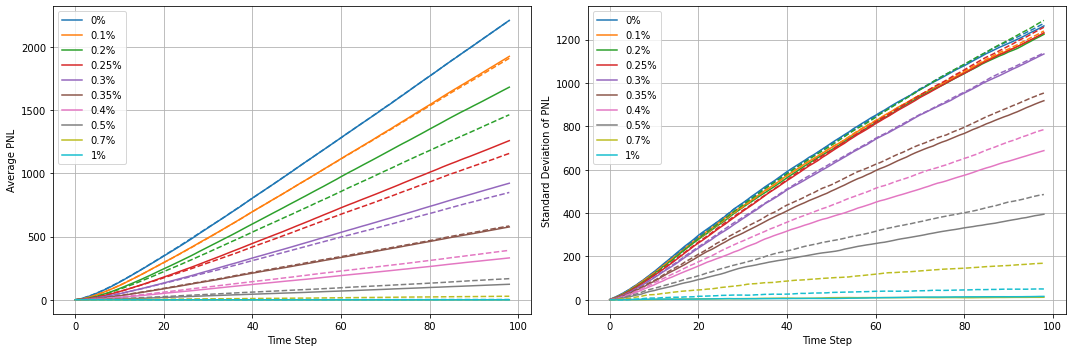

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

fee_results_trained = list()
fee_results_ideal = list()
for result in fee_results:
  if '1.5%' not in result.name and not ('3%' in result.name and not '0.3' in result.name):
    if 'Ideal' in result.name:
      fee_results_ideal.append(result)
    else:
      fee_results_trained.append(result)

colours = plt.rcParams['axes.prop_cycle'].by_key()['color']
i = 0

for result in fee_results_trained:
  mean_pnl, std_pnl = result.get_mean_pnl()
  ax[0].plot(mean_pnl.cpu(), color = colours[i], label = result.name)
  ax[1].plot(std_pnl.cpu(), color = colours[i], label = result.name)
  i += 1

i = 0
for result in fee_results_ideal:
  mean_pnl, std_pnl = result.get_mean_pnl()
  ax[0].plot(mean_pnl.cpu(), '--', color = colours[i])
  ax[1].plot(std_pnl.cpu(), '--', color = colours[i])
  i += 1

ax[0].grid()
ax[0].set_xlabel('Time Step')
ax[0].set_ylabel('Average PNL')
ax[0].legend()

ax[1].grid()
ax[1].set_xlabel('Time Step')
ax[1].set_ylabel('Standard Deviation of PNL')
ax[1].legend()

fig.tight_layout()

plt.show()
save_fig = True
fig_name = 'fees_pnl_vs_time_1.png'
if save_fig:
  fig.savefig(os.path.join(plots_path,fig_name))

In [ ]:
ideal_results = list()
trained_results = list()

for result in fee_results:
  if '1.5%' not in result.name and not ('3%' in result.name and not '0.3' in result.name):

    if 'Ideal' in result.name:
      ideal_results.append(result)
    else:
      trained_results.append(result)

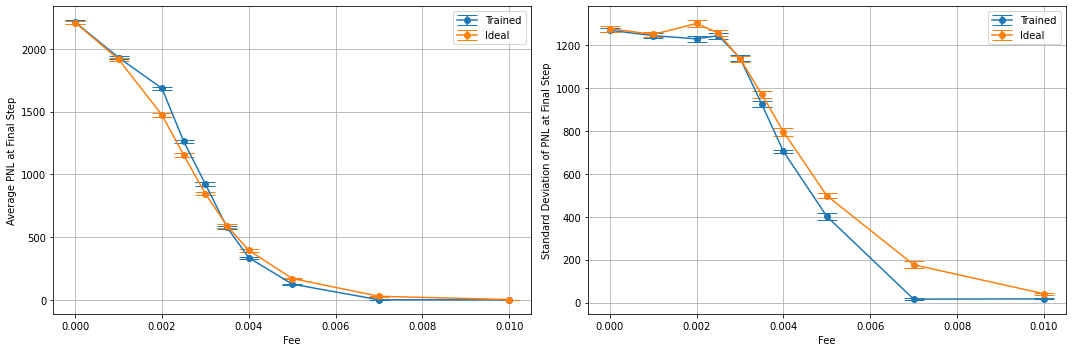

In [ ]:
fees = list()
ideal_means = list()
ideal_means_error = list()
trained_means = list()
trained_means_error = list()
ideal_stds = list()
ideal_stds_error = list()
trained_stds = list()
trained_stds_error = list()


for result in ideal_results:
  pnl = result.final_profits()
  ideal_means.append(np.mean(sim_means[result.name]))
  ideal_stds.append(np.mean(sim_stds[result.name]))
  fees.append(result.agent.f_L)

  ideal_means_error.append(np.std(sim_means[result.name]))
  ideal_stds_error.append(np.std(sim_stds[result.name]))

for result in trained_results:
  pnl = result.final_profits()
  trained_means.append(np.mean(sim_means[result.name]))
  trained_stds.append(np.mean(sim_stds[result.name]))
  
  trained_means_error.append(np.std(sim_means[result.name]))
  trained_stds_error.append(np.std(sim_stds[result.name]))

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].errorbar(fees, trained_means, yerr=trained_means_error, marker='o', capsize=10 , label = 'Trained')
ax[0].errorbar(fees, ideal_means, yerr=ideal_means_error, marker='o', capsize=10, label = 'Ideal')
#ax[0].plot(fees, trained_means, label='Trained', marker='o')
#ax[0].plot(fees, ideal_means, label='Ideal', marker='o')
ax[0].grid()
ax[0].set_xlabel('Fee')
ax[0].set_ylabel('Average PNL at Final Step')
ax[0].legend()

ax[1].errorbar(fees, trained_stds, yerr=trained_stds_error, marker='o', capsize=10 , label = 'Trained')
ax[1].errorbar(fees, ideal_stds, yerr=ideal_stds_error, marker='o', capsize=10, label = 'Ideal')
#ax[1].plot(fees, trained_stds, label='Trained', marker='o')
#ax[1].plot(fees, ideal_stds, label='Ideal', marker='o')
ax[1].set_xlabel('Fee')
ax[1].set_ylabel('Standard Deviation of PNL at Final Step')
ax[1].grid()
ax[1].legend()
fig.tight_layout()
plt.show()

save_fig = True
fig_name = 'FeesVSPNL.png'

if save_fig:
  fig.savefig(os.path.join(plots_path,fig_name))

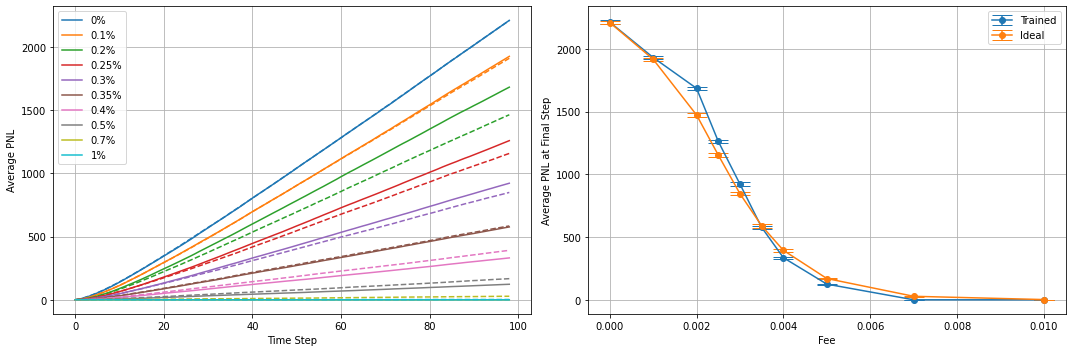

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[1].errorbar(fees, trained_means, yerr=trained_means_error, marker='o', capsize=10 , label = 'Trained')
ax[1].errorbar(fees, ideal_means, yerr=ideal_means_error, marker='o', capsize=10, label = 'Ideal')
#ax[0].plot(fees, trained_means, label='Trained', marker='o')
#ax[0].plot(fees, ideal_means, label='Ideal', marker='o')
ax[1].grid()
ax[1].set_xlabel('Fee')
ax[1].set_ylabel('Average PNL at Final Step')
ax[1].legend()

colours = plt.rcParams['axes.prop_cycle'].by_key()['color']
i = 0

for result in fee_results_trained:
  mean_pnl, std_pnl = result.get_mean_pnl()
  ax[0].plot(mean_pnl.cpu(), color = colours[i], label = result.name)
  i += 1

i = 0
for result in fee_results_ideal:
  mean_pnl, std_pnl = result.get_mean_pnl()
  ax[0].plot(mean_pnl.cpu(), '--', color = colours[i])
  i += 1

ax[0].grid()
ax[0].set_xlabel('Time Step')
ax[0].set_ylabel('Average PNL')
ax[0].legend()


fig.tight_layout()
plt.show()

save_fig = True
fig_name = 'HybridFeesGraph.png'

if save_fig:
  fig.savefig(os.path.join(plots_path,fig_name))

In [ ]:
%pip install torchviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
for name, param in fee_results[0].agent.C.named_parameters():
    print(f'Initial Params C: Name: {name}, Param: {param}')

for name, param in fee_results[0].agent.v.named_parameters():
    print(f'Initial Params v: Name: {name}, Param: {param}')


Initial Params C: Name: net.0.weight, Param: Parameter containing:
tensor([1.0635, 1.0234, 0.1974, 0.9775, 0.0399, 0.3435], dtype=torch.float64,
       requires_grad=True)
Initial Params C: Name: net.0.bias, Param: Parameter containing:
tensor([-9.6016e-09,  6.6444e-09, -3.8485e-10,  5.2641e-10,  1.0226e-09,
        -1.2826e-10], dtype=torch.float64, requires_grad=True)
Initial Params C: Name: net.1.weight, Param: Parameter containing:
tensor([[ 0.4120,  0.2700, -0.7280,  0.0892,  0.0376,  0.2243],
        [-0.2086,  0.2407, -0.0620, -0.6301, -0.1693,  0.3246],
        [ 0.0763,  0.3775, -0.2260, -0.4495, -0.4237, -0.0801],
        [ 0.1093, -0.0904, -0.1246, -0.5775,  0.2591, -0.1864],
        [ 0.1723, -0.2856,  0.1483, -0.3383, -0.2370,  0.1586],
        [-0.5333,  0.2463,  0.3218, -0.2706,  0.0127,  0.0108],
        [ 0.1292, -0.3310,  0.1011, -0.2397, -0.2806,  0.4874],
        [ 0.0435, -0.0591,  0.0258,  0.6319, -0.2403,  0.1742],
        [ 0.6322, -0.5140, -0.0638,  0.2145, -0.

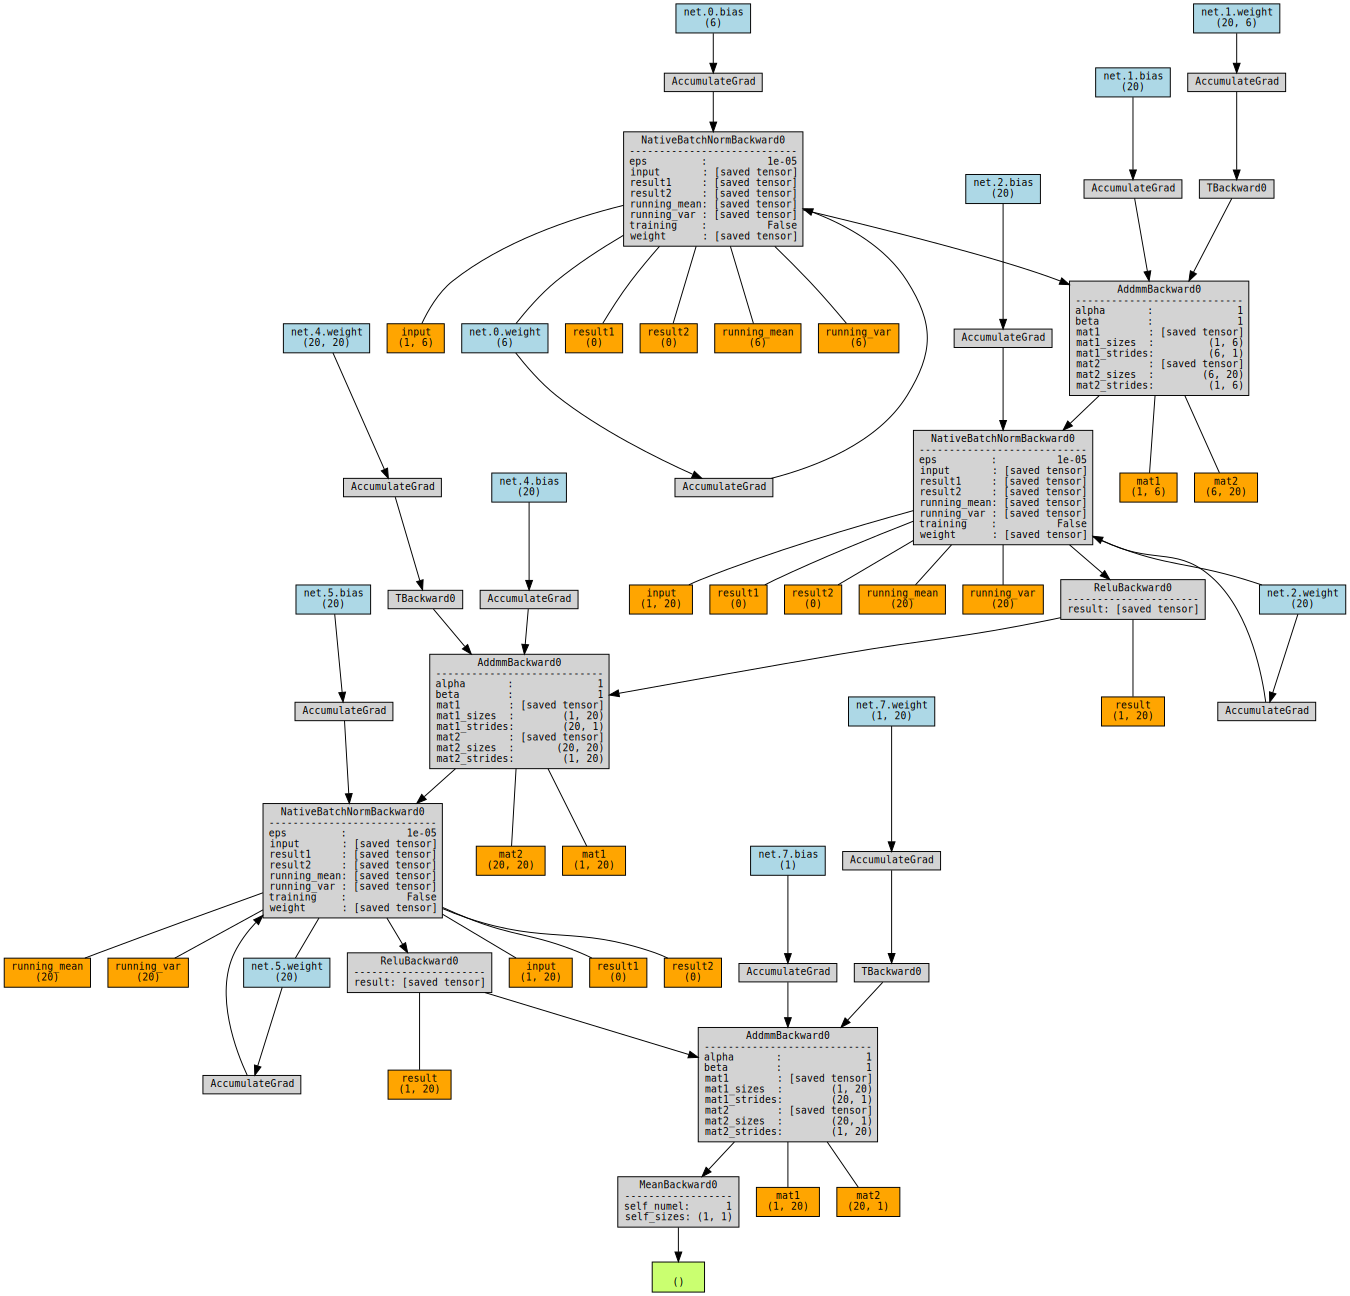

In [ ]:
from  torchviz import make_dot

model = fee_results[0].agent.v

x = torch.randn(1, 6, dtype=torch.float64)
y = model(x)

make_dot(y.mean(), params=dict(model.named_parameters()), show_attrs=True, show_saved=True)